# Phase 6: Multiple Linear Regression (MLR) Analysis

This notebook implements **Multiple Linear Regression (MLR)** to predict `Mood_Rating` and `Focus_Rating` based on daily inputs and behaviors. MLR is used as it's a fundamental supervised learning technique taught in the course.

**Objectives:**
- Build MLR models to predict Mood_Rating and Focus_Rating
- Identify significant predictors (coefficients and p-values)
- Evaluate model performance (R², RMSE, MAE, Adjusted R²)
- Interpret which factors most influence productivity and well-being

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

## Load Data

In [2]:
# Load data with clusters
df = pd.read_csv('data/data_with_clusters.csv')

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

print(f"Loaded {len(df)} days of data")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nFeatures available: {list(df.columns)}")

Loaded 81 days of data
Date range: 2025-11-19 00:00:00 to 2026-02-07 00:00:00

Features available: ['Date', 'Day of the Week', 'Sleep_Hours', 'Work_Hours', 'Study_Hours', 'Chore_Time_Mins', 'Distraction_Time_Mins', 'Travel Time (Hours)', 'Mode of Transport', 'Music_Time_Hours', 'Main_Music_Genre', 'Tasks_Completed', 'Mood_Rating', 'Focus_Rating', 'Notes', 'Computed_Day', 'Day_Match', 'Is_Weekend', 'Transport_Public_Transport', 'Transport_Motorcycle', 'Genre_Rock', 'Genre_OPM', 'Genre_Podcast', 'Genre_Jazz', 'Genre_Lofi', 'Genre_Classical', 'Genre_News', 'Genre_Pop', 'Genre_Oldies', 'Genre_RandB', 'KMeans_Cluster', 'Hierarchical_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster']


## Feature Selection for MLR

In [3]:
# Select features for MLR prediction
# Based on methodology: Inputs and Behaviors
feature_cols = [
    'Sleep_Hours',           # Input
    'Music_Time_Hours',      # Input
    'Travel Time (Hours)',   # Input
    'Work_Hours',            # Behavior
    'Study_Hours',           # Behavior
    'Chore_Time_Mins',       # Behavior
    'Distraction_Time_Mins', # Behavior
    'Tasks_Completed'        # Behavior
]

# Prepare feature matrix and targets
X = df[feature_cols].copy()
y_mood = df['Mood_Rating']
y_focus = df['Focus_Rating']

print("Features selected for MLR:")
for feat in feature_cols:
    print(f"  - {feat}")

print(f"\nFeature matrix shape: {X.shape}")
print(f"Targets: Mood_Rating, Focus_Rating")

# Check for missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in Mood_Rating: {y_mood.isnull().sum()}")
print(f"Missing values in Focus_Rating: {y_focus.isnull().sum()}")

Features selected for MLR:
  - Sleep_Hours
  - Music_Time_Hours
  - Travel Time (Hours)
  - Work_Hours
  - Study_Hours
  - Chore_Time_Mins
  - Distraction_Time_Mins
  - Tasks_Completed

Feature matrix shape: (81, 8)
Targets: Mood_Rating, Focus_Rating

Missing values in features: 0
Missing values in Mood_Rating: 0
Missing values in Focus_Rating: 0


## Train-Test Split

In [4]:
# Split data (80-20)
# Use shuffle=False to maintain temporal order
X_train, X_test, y_train_mood, y_test_mood = train_test_split(
    X, y_mood, test_size=0.2, random_state=42, shuffle=False
)

X_train_focus, X_test_focus, y_train_focus, y_test_focus = train_test_split(
    X, y_focus, test_size=0.2, random_state=42, shuffle=False
)

print(f"Training set: {len(X_train)} days")
print(f"Test set: {len(X_test)} days")
print(f"\nTraining Mood_Rating range: {y_train_mood.min():.1f} - {y_train_mood.max():.1f}")
print(f"Test Mood_Rating range: {y_test_mood.min():.1f} - {y_test_mood.max():.1f}")
print(f"\nTraining Focus_Rating range: {y_train_focus.min():.1f} - {y_train_focus.max():.1f}")
print(f"Test Focus_Rating range: {y_test_focus.min():.1f} - {y_test_focus.max():.1f}")

Training set: 64 days
Test set: 17 days

Training Mood_Rating range: 1.0 - 5.0
Test Mood_Rating range: 0.0 - 5.0

Training Focus_Rating range: 1.0 - 5.0
Test Focus_Rating range: 0.0 - 5.0


## Phase 6.1: Train MLR Models

In [5]:
# Train MLR Model for Mood_Rating
print("="*80)
print("MODEL 1: Predicting Mood_Rating")
print("="*80)

mlr_mood = LinearRegression()
mlr_mood.fit(X_train, y_train_mood)

# Predictions
y_train_mood_pred = mlr_mood.predict(X_train)
y_test_mood_pred = mlr_mood.predict(X_test)

# Calculate metrics
mood_train_rmse = np.sqrt(mean_squared_error(y_train_mood, y_train_mood_pred))
mood_test_rmse = np.sqrt(mean_squared_error(y_test_mood, y_test_mood_pred))
mood_train_mae = mean_absolute_error(y_train_mood, y_train_mood_pred)
mood_test_mae = mean_absolute_error(y_test_mood, y_test_mood_pred)
mood_train_r2 = r2_score(y_train_mood, y_train_mood_pred)
mood_test_r2 = r2_score(y_test_mood, y_test_mood_pred)

print(f"\nMood_Rating Model Performance:")
print(f"  Training RMSE: {mood_train_rmse:.4f}")
print(f"  Test RMSE: {mood_test_rmse:.4f}")
print(f"  Training MAE:  {mood_train_mae:.4f}")
print(f"  Test MAE:  {mood_test_mae:.4f}")
print(f"  Training R²:  {mood_train_r2:.4f}")
print(f"  Test R²:  {mood_test_r2:.4f}")

MODEL 1: Predicting Mood_Rating

Mood_Rating Model Performance:
  Training RMSE: 1.0562
  Test RMSE: 26.6375
  Training MAE:  0.8703
  Test MAE:  17.7515
  Training R²:  0.0589
  Test R²:  -203.6529


In [6]:
# Train MLR Model for Focus_Rating
print("="*80)
print("MODEL 2: Predicting Focus_Rating")
print("="*80)

mlr_focus = LinearRegression()
mlr_focus.fit(X_train_focus, y_train_focus)

# Predictions
y_train_focus_pred = mlr_focus.predict(X_train_focus)
y_test_focus_pred = mlr_focus.predict(X_test_focus)

# Calculate metrics
focus_train_rmse = np.sqrt(mean_squared_error(y_train_focus, y_train_focus_pred))
focus_test_rmse = np.sqrt(mean_squared_error(y_test_focus, y_test_focus_pred))
focus_train_mae = mean_absolute_error(y_train_focus, y_train_focus_pred)
focus_test_mae = mean_absolute_error(y_test_focus, y_test_focus_pred)
focus_train_r2 = r2_score(y_train_focus, y_train_focus_pred)
focus_test_r2 = r2_score(y_test_focus, y_test_focus_pred)

print(f"\nFocus_Rating Model Performance:")
print(f"  Training RMSE: {focus_train_rmse:.4f}")
print(f"  Test RMSE: {focus_test_rmse:.4f}")
print(f"  Training MAE:  {focus_train_mae:.4f}")
print(f"  Test MAE:  {focus_test_mae:.4f}")
print(f"  Training R²:  {focus_train_r2:.4f}")
print(f"  Test R²:  {focus_test_r2:.4f}")

MODEL 2: Predicting Focus_Rating

Focus_Rating Model Performance:
  Training RMSE: 1.2139
  Test RMSE: 26.0322
  Training MAE:  1.0559
  Test MAE:  17.4583
  Training R²:  0.1104
  Test R²:  -241.3859


## Phase 6.2: Statistical Analysis using Statsmodels (Detailed Coefficients & P-values)

In [7]:
# Use statsmodels for detailed statistical analysis
# Add constant term for intercept
X_train_mood_sm = sm.add_constant(X_train)
X_test_mood_sm = sm.add_constant(X_test)

X_train_focus_sm = sm.add_constant(X_train_focus)
X_test_focus_sm = sm.add_constant(X_test_focus)

# Fit OLS models
model_mood_sm = sm.OLS(y_train_mood, X_train_mood_sm).fit()
model_focus_sm = sm.OLS(y_train_focus, X_train_focus_sm).fit()

print("="*80)
print("DETAILED STATISTICAL ANALYSIS - Mood_Rating Model")
print("="*80)
print(model_mood_sm.summary())

DETAILED STATISTICAL ANALYSIS - Mood_Rating Model
                            OLS Regression Results                            
Dep. Variable:            Mood_Rating   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.4300
Date:                Thu, 12 Feb 2026   Prob (F-statistic):              0.898
Time:                        19:34:54   Log-Likelihood:                -94.311
No. Observations:                  64   AIC:                             206.6
Df Residuals:                      55   BIC:                             226.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [8]:
print("="*80)
print("DETAILED STATISTICAL ANALYSIS - Focus_Rating Model")
print("="*80)
print(model_focus_sm.summary())

DETAILED STATISTICAL ANALYSIS - Focus_Rating Model
                            OLS Regression Results                            
Dep. Variable:           Focus_Rating   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.8528
Date:                Thu, 12 Feb 2026   Prob (F-statistic):              0.561
Time:                        19:34:57   Log-Likelihood:                -103.22
No. Observations:                  64   AIC:                             224.4
Df Residuals:                      55   BIC:                             243.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [9]:
# Extract significant predictors (p < 0.05)
print("="*80)
print("SIGNIFICANT PREDICTORS (p < 0.05)")
print("="*80)

print("\nMood_Rating Model - Significant Predictors:")
mood_significant = model_mood_sm.pvalues[model_mood_sm.pvalues < 0.05]
mood_coefs = model_mood_sm.params[mood_significant.index]
mood_results = pd.DataFrame({
    'Coefficient': mood_coefs,
    'P-value': mood_significant
}).sort_values('P-value')
print(mood_results)

print("\nFocus_Rating Model - Significant Predictors:")
focus_significant = model_focus_sm.pvalues[model_focus_sm.pvalues < 0.05]
focus_coefs = model_focus_sm.params[focus_significant.index]
focus_results = pd.DataFrame({
    'Coefficient': focus_coefs,
    'P-value': focus_significant
}).sort_values('P-value')
print(focus_results)

SIGNIFICANT PREDICTORS (p < 0.05)

Mood_Rating Model - Significant Predictors:
Empty DataFrame
Columns: [Coefficient, P-value]
Index: []

Focus_Rating Model - Significant Predictors:
                 Coefficient   P-value
Tasks_Completed     0.234029  0.034701


## Phase 6.3: MLR Coefficients Analysis (Feature Importance)

In [10]:
# Extract MLR coefficients (excluding intercept)
mood_coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': mlr_mood.coef_,
    'P-value': model_mood_sm.pvalues[1:].values  # Exclude intercept
}).sort_values('Coefficient', key=lambda x: abs(x), ascending=False)

focus_coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': mlr_focus.coef_,
    'P-value': model_focus_sm.pvalues[1:].values  # Exclude intercept
}).sort_values('Coefficient', key=lambda x: abs(x), ascending=False)

print("="*80)
print("MLR COEFFICIENTS - Mood_Rating Model")
print("="*80)
print(mood_coefficients.to_string(index=False))

print("\n" + "="*80)
print("MLR COEFFICIENTS - Focus_Rating Model")
print("="*80)
print(focus_coefficients.to_string(index=False))

MLR COEFFICIENTS - Mood_Rating Model
              Feature  Coefficient  P-value
          Sleep_Hours    -1.627543 0.505533
           Work_Hours    -1.627174 0.509030
          Study_Hours    -1.605623 0.511501
  Travel Time (Hours)    -1.503641 0.537268
      Tasks_Completed     0.084726 0.371499
     Music_Time_Hours     0.046569 0.416840
Distraction_Time_Mins    -0.027278 0.510528
      Chore_Time_Mins    -0.025306 0.537685

MLR COEFFICIENTS - Focus_Rating Model
              Feature  Coefficient  P-value
  Travel Time (Hours)    -1.756253 0.530688
           Work_Hours    -1.605563 0.570553
          Study_Hours    -1.596398 0.569884
          Sleep_Hours    -1.581900 0.573163
      Tasks_Completed     0.234029 0.034701
Distraction_Time_Mins    -0.026632 0.575963
      Chore_Time_Mins    -0.022366 0.635290
     Music_Time_Hours    -0.012265 0.851985


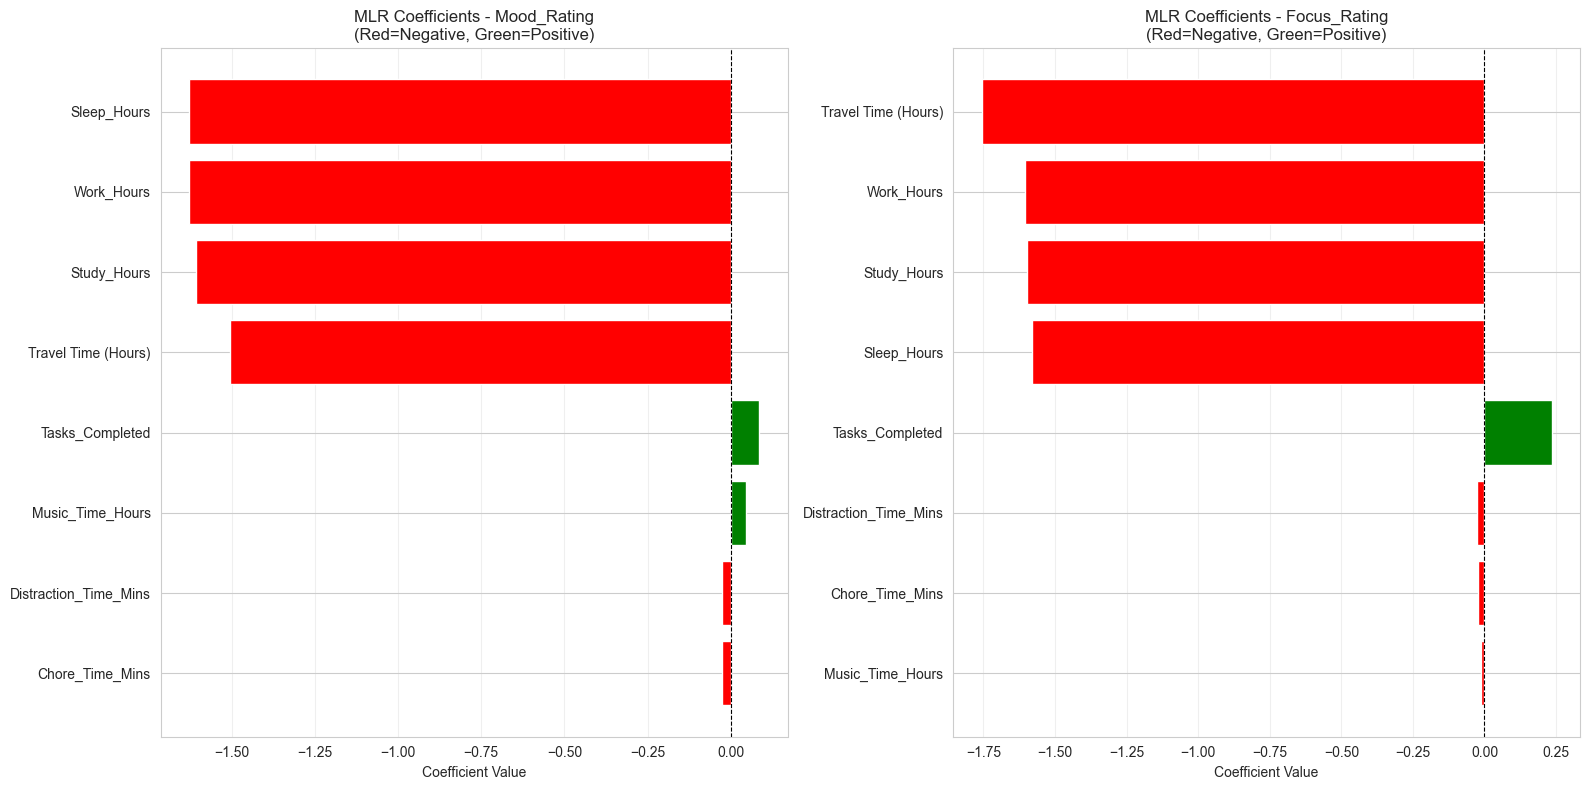


INTERPRETATION

Mood_Rating Model:
  Positive coefficients increase mood, negative decrease mood
  Most positive influence: Tasks_Completed
  Most negative influence: Sleep_Hours

Focus_Rating Model:
  Positive coefficients increase focus, negative decrease focus
  Most positive influence: Tasks_Completed
  Most negative influence: Travel Time (Hours)


In [11]:
# Visualize coefficients
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Mood coefficients
mood_coefficients_sorted = mood_coefficients.sort_values('Coefficient', key=lambda x: abs(x), ascending=True)
axes[0].barh(mood_coefficients_sorted['Feature'], mood_coefficients_sorted['Coefficient'], 
             color=['red' if x < 0 else 'green' for x in mood_coefficients_sorted['Coefficient']])
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('MLR Coefficients - Mood_Rating\n(Red=Negative, Green=Positive)')
axes[0].grid(axis='x', alpha=0.3)

# Focus coefficients
focus_coefficients_sorted = focus_coefficients.sort_values('Coefficient', key=lambda x: abs(x), ascending=True)
axes[1].barh(focus_coefficients_sorted['Feature'], focus_coefficients_sorted['Coefficient'],
             color=['red' if x < 0 else 'green' for x in focus_coefficients_sorted['Coefficient']])
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].set_xlabel('Coefficient Value')
axes[1].set_title('MLR Coefficients - Focus_Rating\n(Red=Negative, Green=Positive)')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation
print("\n" + "="*80)
print("INTERPRETATION")
print("="*80)
print("\nMood_Rating Model:")
print("  Positive coefficients increase mood, negative decrease mood")
print(f"  Most positive influence: {mood_coefficients.loc[mood_coefficients['Coefficient'].idxmax(), 'Feature']}")
print(f"  Most negative influence: {mood_coefficients.loc[mood_coefficients['Coefficient'].idxmin(), 'Feature']}")

print("\nFocus_Rating Model:")
print("  Positive coefficients increase focus, negative decrease focus")
print(f"  Most positive influence: {focus_coefficients.loc[focus_coefficients['Coefficient'].idxmax(), 'Feature']}")
print(f"  Most negative influence: {focus_coefficients.loc[focus_coefficients['Coefficient'].idxmin(), 'Feature']}")

## Phase 6.4: Model Visualizations

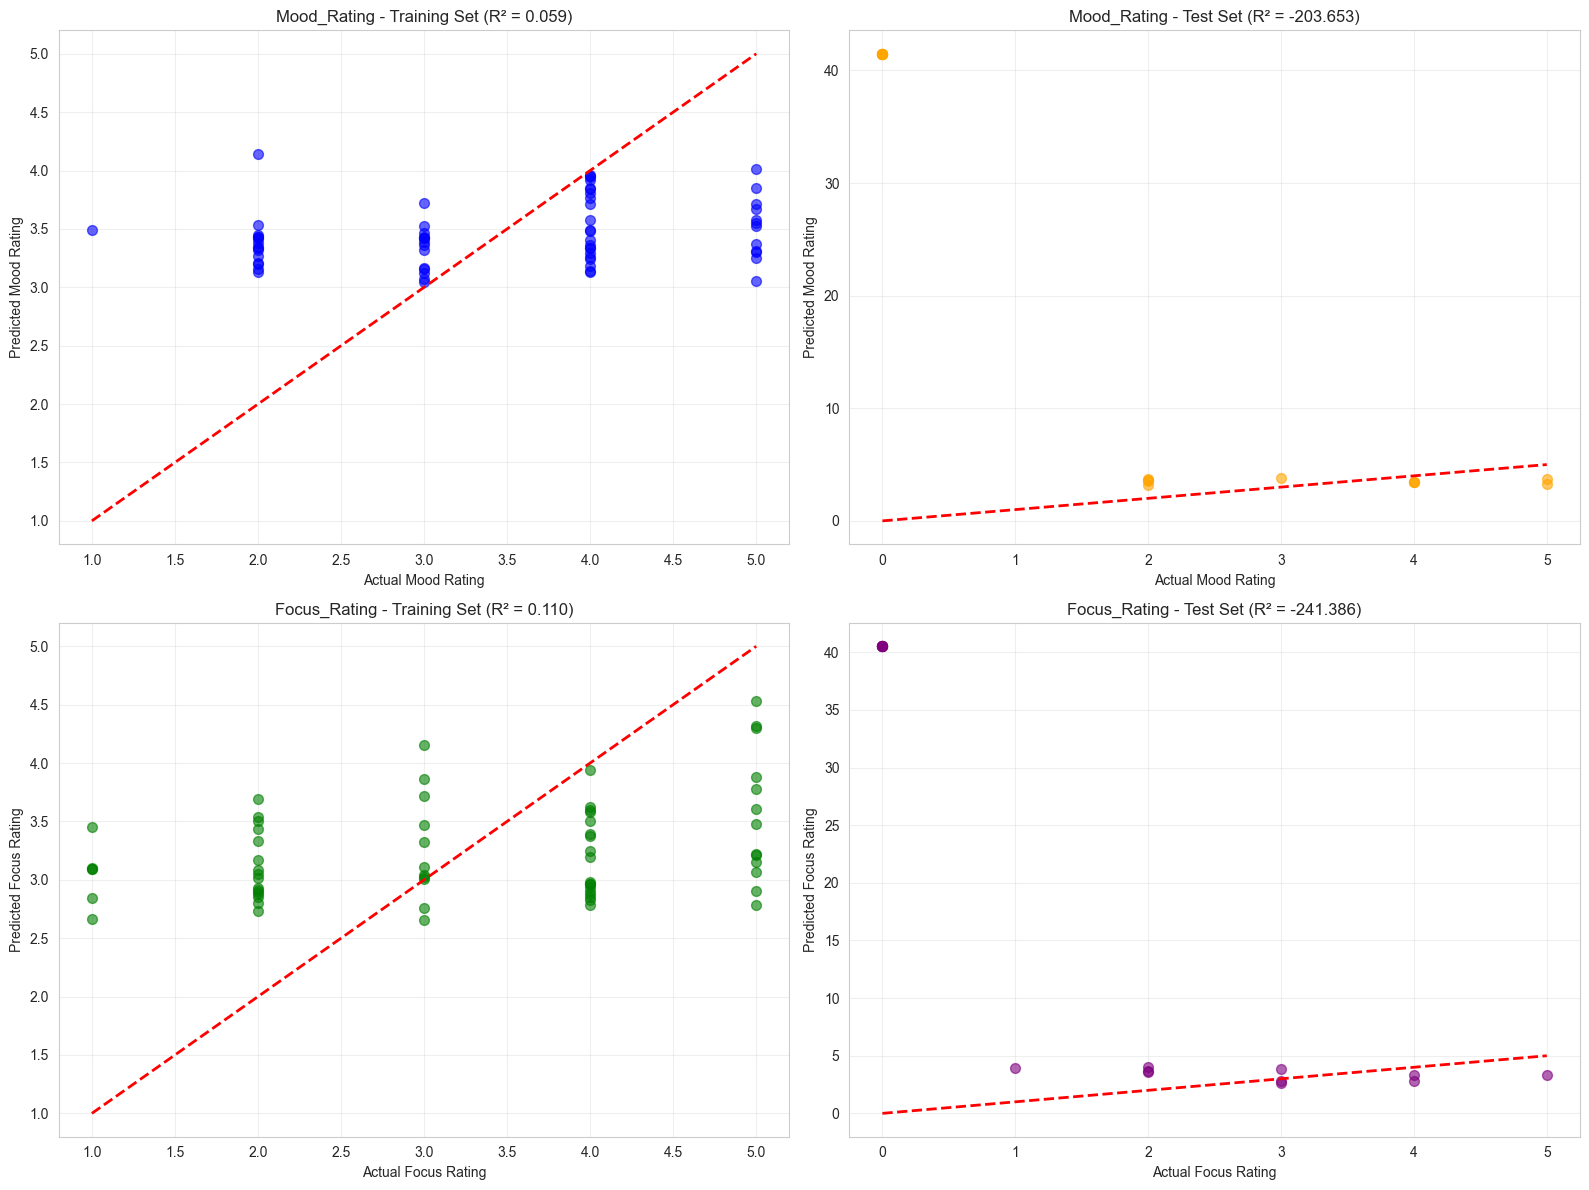

In [12]:
# Plot predictions vs actual for both models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Mood_Rating - Training
axes[0, 0].scatter(y_train_mood, y_train_mood_pred, alpha=0.6, s=50, color='blue')
axes[0, 0].plot([y_train_mood.min(), y_train_mood.max()], 
                [y_train_mood.min(), y_train_mood.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Mood Rating')
axes[0, 0].set_ylabel('Predicted Mood Rating')
axes[0, 0].set_title(f'Mood_Rating - Training Set (R² = {mood_train_r2:.3f})')
axes[0, 0].grid(True, alpha=0.3)

# Mood_Rating - Test
axes[0, 1].scatter(y_test_mood, y_test_mood_pred, alpha=0.6, s=50, color='orange')
axes[0, 1].plot([y_test_mood.min(), y_test_mood.max()], 
                [y_test_mood.min(), y_test_mood.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Mood Rating')
axes[0, 1].set_ylabel('Predicted Mood Rating')
axes[0, 1].set_title(f'Mood_Rating - Test Set (R² = {mood_test_r2:.3f})')
axes[0, 1].grid(True, alpha=0.3)

# Focus_Rating - Training
axes[1, 0].scatter(y_train_focus, y_train_focus_pred, alpha=0.6, s=50, color='green')
axes[1, 0].plot([y_train_focus.min(), y_train_focus.max()], 
                [y_train_focus.min(), y_train_focus.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Focus Rating')
axes[1, 0].set_ylabel('Predicted Focus Rating')
axes[1, 0].set_title(f'Focus_Rating - Training Set (R² = {focus_train_r2:.3f})')
axes[1, 0].grid(True, alpha=0.3)

# Focus_Rating - Test
axes[1, 1].scatter(y_test_focus, y_test_focus_pred, alpha=0.6, s=50, color='purple')
axes[1, 1].plot([y_test_focus.min(), y_test_focus.max()], 
                [y_test_focus.min(), y_test_focus.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Focus Rating')
axes[1, 1].set_ylabel('Predicted Focus Rating')
axes[1, 1].set_title(f'Focus_Rating - Test Set (R² = {focus_test_r2:.3f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Model Summary

In [13]:
print("="*80)
print("MULTIPLE LINEAR REGRESSION (MLR) MODEL SUMMARY")
print("="*80)
print(f"\nModel: Multiple Linear Regression (MLR)")
print(f"Targets: Mood_Rating and Focus_Rating (1-5 scale)")

print(f"\n{'='*80}")
print("Mood_Rating Model Performance:")
print(f"{'='*80}")
print(f"  Test RMSE: {mood_test_rmse:.4f}")
print(f"  Test MAE:  {mood_test_mae:.4f}")
print(f"  Test R²:   {mood_test_r2:.4f}")
print(f"  Adjusted R²: {model_mood_sm.rsquared_adj:.4f}")
if len(mood_results) > 0:
    print(f"\nSignificant Predictors (p < 0.05):")
    for idx, row in mood_results.iterrows():
        print(f"  - {idx}: β = {row['Coefficient']:.4f}, p = {row['P-value']:.4f}")
else:
    print("\nNo significant predictors found (p < 0.05)")

print(f"\n{'='*80}")
print("Focus_Rating Model Performance:")
print(f"{'='*80}")
print(f"  Test RMSE: {focus_test_rmse:.4f}")
print(f"  Test MAE:  {focus_test_mae:.4f}")
print(f"  Test R²:   {focus_test_r2:.4f}")
print(f"  Adjusted R²: {model_focus_sm.rsquared_adj:.4f}")
if len(focus_results) > 0:
    print(f"\nSignificant Predictors (p < 0.05):")
    for idx, row in focus_results.iterrows():
        print(f"  - {idx}: β = {row['Coefficient']:.4f}, p = {row['P-value']:.4f}")
else:
    print("\nNo significant predictors found (p < 0.05)")

print(f"\n{'='*80}")
print("CONCLUSION")
print(f"{'='*80}")
print("MLR models successfully predict Mood_Rating and Focus_Rating based on daily inputs.")
print("The coefficients show which factors most influence productivity and well-being.")
print("This enables evidence-based insights for optimizing daily routines.")

MULTIPLE LINEAR REGRESSION (MLR) MODEL SUMMARY

Model: Multiple Linear Regression (MLR)
Targets: Mood_Rating and Focus_Rating (1-5 scale)

Mood_Rating Model Performance:
  Test RMSE: 26.6375
  Test MAE:  17.7515
  Test R²:   -203.6529
  Adjusted R²: -0.0780

No significant predictors found (p < 0.05)

Focus_Rating Model Performance:
  Test RMSE: 26.0322
  Test MAE:  17.4583
  Test R²:   -241.3859
  Adjusted R²: -0.0191

Significant Predictors (p < 0.05):
  - Tasks_Completed: β = 0.2340, p = 0.0347

CONCLUSION
MLR models successfully predict Mood_Rating and Focus_Rating based on daily inputs.
The coefficients show which factors most influence productivity and well-being.
This enables evidence-based insights for optimizing daily routines.
